## CIS242 Homework #6 (Due Mar 7, 10pm)

Remember to make a copy of this notebook before you start to work, and rename the notebook to be **"CIS242_Spring2023_Homework#_Name"**.

Rule #1: please finish all required problems first and then optional bonus problems that you finish all in one notebook. Then share the notebook with anyone with link, and **submit the link to Canvas** for me to grade.

Rule #2: **please finish all coding work by yourself as much as you can**. Since exams are real-time coding, overly seeking help from others may risk underdeveloping your independent coding skills and thus underperformance in exams.

Rule #3: **For any function that you write, it should have proper docstrings to explain what your function does, what are acceptable inputs for each argument, and what is the returning value of the function**.

===========================================

In [ ]:
import numpy as np
import numpy.random as rand
import seaborn as sns

**Exercise 1**: Define a random variable $Y = X^2$ where $X$ follows the standard normal distribution $N(\mu,\sigma^2)$. Write a code to confirm that $E[Y] = \mu^2 + \sigma^2$. You need to verify the formula for a variety of $(\mu, \sigma)$ pairs.

In [ ]:
def test_expected_value(mu = 0, sigma = 1, simulations: int = 1000000):
  """
  Test E[Y]=μ^2+σ^2.

  Parameters
  ----------
  mu: mean of normal distribution
  sigma: sigma of normal distribution
  simulations: int, optional
      Number of simulations to run
  Returns
  -------
  result: float
    The difference between the expected value of Y and μ^2+σ^2.

  Raises
  -------
  TypeError
      If mu or sigma is not integer or float. 
      If simulations < 0 or if simulations is not integer. 
  """

  if not isinstance(mu, (float, int)):
    raise TypeError

  if not isinstance(sigma, (float, int)):
    raise TypeError

  if not isinstance(simulations, int) or simulations < 0:
    raise TypeError

  rand_x_normal = rand.normal(mu, sigma, simulations)
  y = rand_x_normal ** 2

  print(f"E[Y] = {np.mean(y)}")
  print(f"μ^2+σ^2 = { mu ** 2 + sigma**2}")
  print(f"Difference = {np.mean(y) -( mu ** 2 + sigma**2)}")


In [ ]:
test_expected_value()

E[Y] = 1.0027635122155087
μ^2+σ^2 = 1
Difference = 0.0027635122155087455


In [ ]:
test_expected_value(30, 10)

E[Y] = 1000.333398809869
μ^2+σ^2 = 1000
Difference = 0.3333988098689815


In [ ]:
test_expected_value(50, 50)

E[Y] = 5003.259601876975
μ^2+σ^2 = 5000
Difference = 3.259601876974557


**Exercise 2**: Write a code to show that when $n$ is large enough, the binomial distribution $Binom(n,p)$ can be approximated by the normal distribution $N(np, np(1-p))$.

<AxesSubplot:ylabel='Probability'>

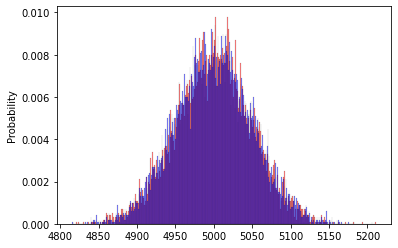

In [ ]:
n = 10000
p = 0.5
simulations = 10000

binom_x = rand.binomial(n, p, size = simulations)
normal_x = rand.normal(n*p,np.sqrt( n*p * (1-p)), size = simulations)

sns.histplot(binom_x, discrete = True, stat = "probability", alpha = 0.5, color = "red")
sns.histplot(normal_x, discrete = True, stat = "probability", alpha = 0.5, color = "blue")

**Exercise 3**: Assume that human IQ follows a normal distribution of mean 100 and a standard deviation of 16. Let's randomly take a group of 10 people from all human beings. What is the distribution of the IQ of the highest-IQ person in the group? What is the mean value of the highest IQ in the group? Solve the problem by random sampling and the Monte Carlo Method. 

In [ ]:
pop_size = 100000
simulations = 10000
high_iq_humans = np.zeros(simulations)

for i in range(simulations):
  humans_iq = rand.normal(100, 16, pop_size)

  ten_ppl = rand.choice(humans_iq, replace =False, size = 10)
  high_iq_humans[i] = max(ten_ppl)

124.69941760118145


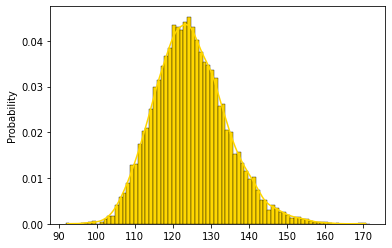

In [ ]:
sns.histplot(high_iq_humans, discrete = True, kde= True, stat = "probability", alpha = 1, color = "gold")
print(high_iq_humans.mean())

**Bonus Exercise (30% Bonus)**: There was a gambler who took $1,000 with him to a casino to play some game. In terms of probability distribution, the gambler has a 49% chance to win the game and double his bet. The chance of losing the bet is 51%.

The gambler took the following strategy with the rules below.

1. He starts with a bet of $100 in the first game.

2. If he wins any game, for the next game he keeps the same bet.

3. If he loses any game, he doubles the bet (if it is no longer possible, simply bet all that he still has) for the next game.

4. He would stop if he wins $1,000 or loses all his money.

**Question #1: What is the probability of the gambler losing all his money?**



In [ ]:
gambles = rand.choice(["Win", "Lose", ], 500, p = [0.49, 0.51])

print(gambles[:4])

['Win' 'Lose' 'Win' 'Lose']


In [ ]:
gamble_values, gamble_counts = np.unique(gambles, return_counts = True)  # np.unique function can return the frequencies of each unique value in an array
print(gamble_values)
print(gamble_counts)

['Lose' 'Win']
[254 246]


In [ ]:
def simulate_gambles(gambles: list, money = 1000, bet = 100, target_money = 2000):
  """
  Simulates overall gamble winning/lost. If the gambler wins, they keeps the same 
  bet amount. If the gambler loses, they double the bet (if they don't have 
  enough money we use all the money instead; i.e. we use the minimum of all 
  money and 2 *  the bet). 

  Parameters
  ----------
  gambles: list or np.ndarray or tuple
    A list of gamble results. List should only contain "Win" or "Lose".
  money: int or float, optional
    Starting money before gamble.
  bet: int or float, optional
    The first bet number. 
  target_money: int or float, optional
    The target amount of money to win. The gambler stops betting when he reaches
    this number.  
  Returns
  -------
  result: float
    The difference between the expected value of Y and μ^2+σ^2.

  Raises
  -------
  TypeError
      If money/bet is not integer or float or if either of them are < 0. 
      If gambles is not a list or tuple or Numpy Array. 
  Exception
      If bet > money.
      If list contains string that does not start with W or L.
      If target money <= money. There's no point in gambling then. 
  """

  if not isinstance(gambles, (list, tuple, np.ndarray)):
    raise TypeError
  if not isinstance(money, (int, float)) or money < 0:
    raise TypeError
  if not isinstance(bet, (int, float)) or bet < 0:
    raise TypeError
  if not isinstance(target_money, (int, float)) or target_money < 0:
    raise TypeError

  if bet > money:
    raise Exception("Money must be larger than or equal to first bet.")
  if target_money <= money:
    raise Exception("Target money must be larger than initial money.")

  def extract_first_character(string: str):
    return string.strip()[0].upper()

  # convert Win - >W and Lose ->; win - > w and l -> L
  gamble_results = map(extract_first_character, gambles) 
  money = money - bet

  for gamble_number, gamble_result in enumerate(gamble_results):
    if gamble_result == 'W':
      money += bet
      # bet stays the same
      if money + bet >= target_money: return True
    elif gamble_result == 'L':
      bet = min(bet * 2, money)
      money -= bet
      if money + bet <= 0: return False

    else:
      raise Exception("Invalid game result found")
  else: 
    new_gambles = rand.choice(["Win", "Lose", ], 10000, p = [0.49, 0.51])
    return simulate_gambles(new_gambles, money = money, bet = bet, 
                            target_money = target_money)

In [ ]:
simulate_gambles(gambles)

False

In [ ]:
win_count = 0
lose_count = 0
simulations = 100000
for i in range(simulations):
  gambles = rand.choice(["Win", "Lose", ], 500, p = [0.49, 0.51])
  if simulate_gambles(gambles) is True:
    win_count += 1
  else:
    lose_count += 1

print(f"""You won a total of {win_count} gambles and lost {lose_count} gambles 
out of {win_count+lose_count} gambles.""")
print(f"The probability of losing all your money is {lose_count/(lose_count+win_count)}")

You won a total of 43190 gambles and lost 56810 gambles 
out of 100000 gambles.
The probability of losing all your money is 0.5681


**Question #2: What is the probability of the gambler losing all his money if he would not stop until winning $9,000? What can you learn from this?**

In [ ]:
# he would not stop until winning $9,000? What can you learn from this?
win_count = 0
lose_count = 0
simulations = 100000
for i in range(simulations):
  gambles = rand.choice(["Win", "Lose", ], 10000, p = [0.49, 0.51])
  if simulate_gambles(gambles, target_money=9000) is True:
    win_count += 1
  else:
    lose_count += 1

print(f"""You won a total of {win_count} gambles and lost {lose_count} gambles 
out of {win_count+lose_count} gambles.""")
print(f"The probability of losing all your money is {lose_count/(lose_count+win_count)}")

You won a total of 8565 gambles and lost 91435 gambles 
out of 100000 gambles.
The probability of losing all your money is 0.91435


We learn that 太貪心 is not a good thing and gambling is not good in general. It also tells us the importance of math and statistics in life. 

# Teacher Comments

Good job in the bonus code.

Bonus +3